# Background Subtraction

In [66]:
from ccdproc import CCDData
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

In [67]:
noisy_image = '/data/simon/data/soar/work/GOO_BLU_SPE_2017-05-09/RED/cfzto_1051_Hen-3-729_600BlueBlue.fits'
noisy_image  = '/data/simon/data/soar/work/20161114_eng_3/RED4/cfzsto_0216_EG21_1200M5_GG455.fits'
ccd = CCDData.read(noisy_image)
x, y = ccd.data.shape

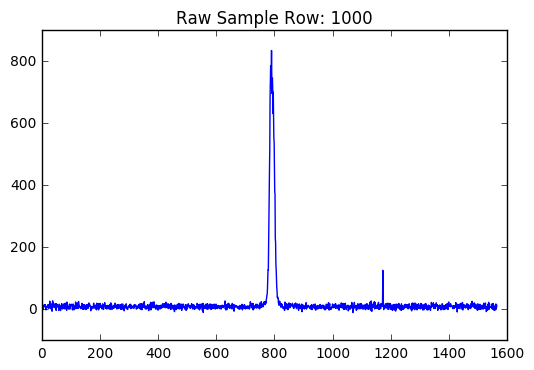

()


In [68]:
i = 1000

sample = ccd.data[:,i]

plt.title('Raw Sample Row: {:d}'.format(i))
plt.plot(sample)
plt.show()
print()
    



(-14.272819, 835.30225, 19.016328424329501, masked_array(data = 9.73401069641,
             mask = False,
       fill_value = 1e+20)
)


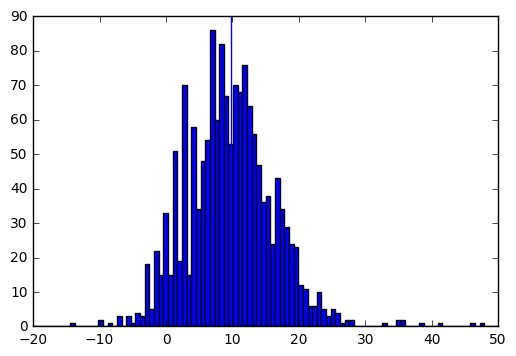

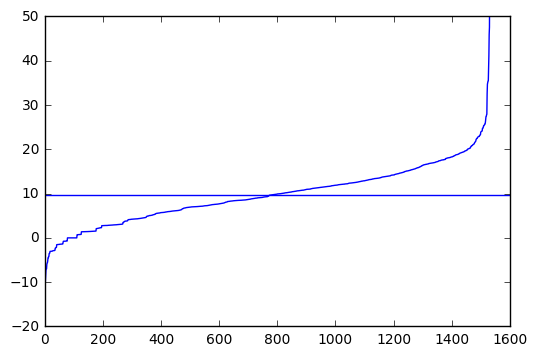

In [69]:
sample = ma.masked_invalid(sample)
# sample = sample[sample.size//2-100:sample.size//2+100]
sorted_sample = sorted(sample)

print(sample.min(), sample.max(), sample.mean(), ma.median(sample))
plt.hist(sample, bins=100, range=[-20, 50])
plt.axvline(ma.median(sample))
plt.show()
plt.plot(sorted_sample)
plt.axhline(ma.median(sample))

plt.ylim(-20, 50)
plt.show()

(-24.006828, 825.56824, 9.2823169849537042, masked_array(data = 4.76837158203e-07,
             mask = False,
       fill_value = 1e+20)
)


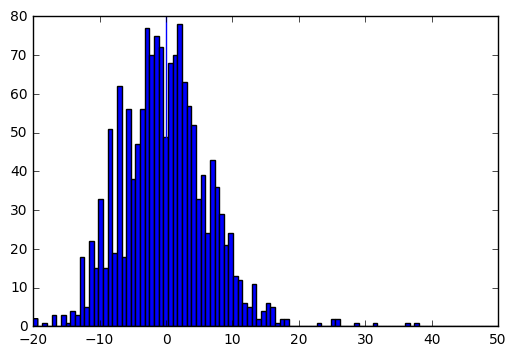

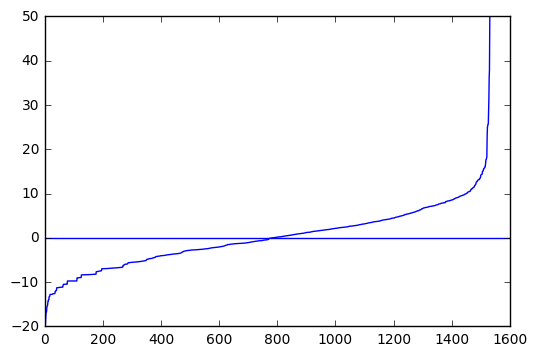

In [70]:
sample = sample - ma.median(sample)

sorted_sample = sorted(sample)

print(sample.min(), sample.max(), sample.mean(), ma.median(sample))
plt.hist(sample, bins=100, range=[-20, 50])
plt.axvline(ma.median(sample))
plt.show()
plt.plot(sorted_sample)
plt.axhline(ma.median(sample))

plt.ylim(-20, 50)
plt.show()

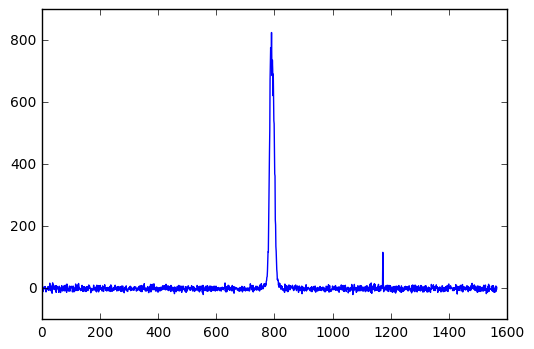

In [71]:
plt.plot(sample)
plt.show()

In [75]:
noisy_image = '/data/simon/data/soar/work/GOO_BLU_SPE_2017-05-09/RED/cfzsto_1031_LTT3864_400M2_GG455.fits'
ccd = CCDData.read(noisy_image)
h, w = ccd.data.shape
data = ma.masked_invalid(ccd.data)
median = ma.median(data, axis=0)
print(median.shape)
print(median.__class__)
data = data - median
[x,y]
[l,c]

ccd.data = data.filled()
ccd.write('/user/simon/dummy.fits', clobber=True)

(4060,)
<class 'numpy.ma.core.MaskedArray'>
